# Problem Statement

The objective is to find trends and define homogenous event categories in a large dataset of police activity spanning many years. The primary objectives are to investigate the dataset's structure, variables, and patterns, cluster similar policing incidents, create meaningful visualizations to depict key features and clusters, investigate strategies for dimensionality reduction, and present descriptive statistics for each cluster.

## Objectives and Goals

* Data Exploration
* Cluster Identification
* Visualization Creation
* Descriptive Statistics

# Imports

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import os
import re
import pandas as pd
import numpy as np
from datetime import date
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE

In [12]:
pip install yellowbrick


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
FILE = 'D:/KULIAH/SEMESTER 7/EXCHANGE/UNSUPERVISED ML/Case Study/11-00091_Field-Interviews_2011-2015.csv'

# Data Exploration and Preprocessing

In [14]:
# Read data from a CSV file into a DataFrame
data = pd.read_csv(FILE)
df_full = pd.DataFrame(data)

# Remove the first row and reset the index of the DataFrame
df_full.drop([0], axis=0, inplace=True)
df_full.reset_index(drop=True, inplace=True)

# Take a random 10% sample of the DataFrame
df = df_full.sample(frac=0.1)

# Display the first few rows of the sampled DataFrame
df.head()

,INCIDENT_UNIQUE_IDENTIFIER,INCIDENT_UNIQUE_IDENTIFIER.1,SUBJECT_GENDER,LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,LOCATION_DISTRICT,LOCATION_DISTRICT.1,INCIDENT_DATE,INCIDENT_TIME,SUBJECT_DETAILS,SUBJECT_RACE,...,VEHICLE_DETAILS.1,OFFICER_SUPERVISOR,OFFICER_ID,OFFICER_ASSIGNMENT,OFFICER_ASSIGNMENT.1,OFFICER_ETHNICITY,OFFICER_RACE,OFFICER_AGE,LOCATION_STREET_NUMBER,LOCATION_CITY
48855,869751,553596,FEMALE,107 BLOOMFIELD ST,C11,5,3/8/12 0:00,3/8/12 0:00,YES,B(Black),...,NO DATA ENTERED,11826.0,12255,16,YVSF,NaN,B(Black),15,481,NO DATA ENTERED
46463,910800,594269,MALE,0 ATLANTIC AV at ESSEX ST,A1,1,3/7/13 0:00,3/7/13 0:00,NO,W(White),...,NO DATA ENTERED,8949.0,120931,1,A1,NaN,W(White),28,249,OTHER
137318,713953,524889,MALE,MAVERICK ST at HAVRE ST,A7,2,5/17/11 0:00,5/17/11 0:00,YES,W(White),...,NO DATA ENTERED,6620.0,103746,2,A7,NaN,W(White),26,2908,East Boston
74030,897821,581203,MALE,76 ANNUNCIATION RD,B2,3,6/13/12 0:00,6/13/12 0:00,YES,B(Black),...,NO DATA ENTERED,11826.0,75636,16,YVSF,NaN,B(Black),31,163,NO DATA ENTERED
99919,1044005,658995,MALE,680 COLUMBIA RD,B2,3,3/3/15 0:00,3/3/15 0:00,YES,H(Hispanic),...,MA,8835.0,131218,3,B2,NaN,H(Hispanic),40,1020,NO DATA ENTERED


In [15]:
print(f"\nThe shape of the data: {df.shape}\n")
print(f"The types of the data: \n{df.dtypes}\n")


The shape of the data: (15223, 34)

The types of the data: 
INCIDENT_UNIQUE_IDENTIFIER                      object
INCIDENT_UNIQUE_IDENTIFIER.1                    object
SUBJECT_GENDER                                  object
LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION    object
LOCATION_DISTRICT                               object
LOCATION_DISTRICT.1                             object
INCIDENT_DATE                                   object
INCIDENT_TIME                                   object
SUBJECT_DETAILS                                 object
SUBJECT_RACE                                    object
SUBJECT_DETAILS.1                               object
SUBJECT_DETAILS.2                               object
UNKNOWN_FIELD_TYPE                              object
UNKNOWN_FIELD_TYPE.1                            object
SEARCH_CONDUCTED                                object
SEARCH_REASON                                   object
INCIDENT_REASON                                 object
INCI

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15223 entries, 48855 to 99976
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   INCIDENT_UNIQUE_IDENTIFIER                    15223 non-null  object
 1   INCIDENT_UNIQUE_IDENTIFIER.1                  15223 non-null  object
 2   SUBJECT_GENDER                                15223 non-null  object
 3   LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION  15222 non-null  object
 4   LOCATION_DISTRICT                             15223 non-null  object
 5   LOCATION_DISTRICT.1                           15223 non-null  object
 6   INCIDENT_DATE                                 15223 non-null  object
 7   INCIDENT_TIME                                 15223 non-null  object
 8   SUBJECT_DETAILS                               13163 non-null  object
 9   SUBJECT_RACE                                  15223 non-null  object

### Data Cleaning

In [17]:
# Replacing specific values with NaN
for col in df.columns:
    df[col].replace(to_replace=["NO DATA ENTERED", 'UNKNOWN', '0', 0, 'OTHER', 'OTHERS'], value=np.nan, inplace=True)

In [18]:
print(f"The empty row shows in data : \n{df.isnull().sum()}")

The empty row shows in data : 
INCIDENT_UNIQUE_IDENTIFIER                          0
INCIDENT_UNIQUE_IDENTIFIER.1                        0
SUBJECT_GENDER                                     24
LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION        1
LOCATION_DISTRICT                                   1
LOCATION_DISTRICT.1                                 0
INCIDENT_DATE                                       0
INCIDENT_TIME                                       0
SUBJECT_DETAILS                                  2245
SUBJECT_RACE                                      665
SUBJECT_DETAILS.1                                1341
SUBJECT_DETAILS.2                                2482
UNKNOWN_FIELD_TYPE                                  0
UNKNOWN_FIELD_TYPE.1                                0
SEARCH_CONDUCTED                                13208
SEARCH_REASON                                   11733
INCIDENT_REASON                                  4765
INCIDENT_REASON.1                                  

In [19]:
# Dropping columns with more than 4000 NaN values
for col in df.columns:
    if df[col].isnull().sum() > 4000:
        df.drop(columns=[col], inplace=True)

# Dropping columns with more than 750 unique values, excluding specific columns
for col in df.columns:
    if col != 'LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION' and col != 'INCIDENT_DATE':
        if df[col].nunique() > 750:
            df.drop(columns=[col], inplace=True)

In [20]:
df.head()

,SUBJECT_GENDER,LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,LOCATION_DISTRICT,LOCATION_DISTRICT.1,INCIDENT_DATE,SUBJECT_DETAILS,SUBJECT_RACE,SUBJECT_DETAILS.2,UNKNOWN_FIELD_TYPE,UNKNOWN_FIELD_TYPE.1,INCIDENT_REASON.1,DISPOSITION,OFFICER_SUPERVISOR,OFFICER_ASSIGNMENT,OFFICER_ASSIGNMENT.1,OFFICER_RACE,OFFICER_AGE
48855,FEMALE,107 BLOOMFIELD ST,C11,5,3/8/12 0:00,YES,B(Black),Med,IO,NO,"INVESTIGATE, PERSON",F,11826.0,16,YVSF,B(Black),15
46463,MALE,0 ATLANTIC AV at ESSEX ST,A1,1,3/7/13 0:00,NO,W(White),Med,OF,NO,"INVESTIGATE, PERSON",F,8949.0,1,A1,W(White),28
137318,MALE,MAVERICK ST at HAVRE ST,A7,2,5/17/11 0:00,YES,W(White),Fair,IO,NO,"INVESTIGATE, PERSON",F,6620.0,2,A7,W(White),26
74030,MALE,76 ANNUNCIATION RD,B2,3,6/13/12 0:00,YES,B(Black),Dark,IO,NO,"INVESTIGATE, PERSON",F,11826.0,16,YVSF,B(Black),31
99919,MALE,680 COLUMBIA RD,B2,3,3/3/15 0:00,YES,H(Hispanic),Med,IOF,NO,"INVESTIGATE, PERSON",FO,8835.0,3,B2,H(Hispanic),40


In [21]:
print(f"The empty row in the data: \n{df.isnull().sum()}")

The empty row in the data: 
SUBJECT_GENDER                                    24
LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION       1
LOCATION_DISTRICT                                  1
LOCATION_DISTRICT.1                                0
INCIDENT_DATE                                      0
SUBJECT_DETAILS                                 2245
SUBJECT_RACE                                     665
SUBJECT_DETAILS.2                               2482
UNKNOWN_FIELD_TYPE                                 0
UNKNOWN_FIELD_TYPE.1                               0
INCIDENT_REASON.1                                  0
DISPOSITION                                      847
OFFICER_SUPERVISOR                              1600
OFFICER_ASSIGNMENT                                 0
OFFICER_ASSIGNMENT.1                              62
OFFICER_RACE                                     665
OFFICER_AGE                                       20
dtype: int64


In [22]:
df.shape

(15223, 17)

In [23]:
df.head()

,SUBJECT_GENDER,LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,LOCATION_DISTRICT,LOCATION_DISTRICT.1,INCIDENT_DATE,SUBJECT_DETAILS,SUBJECT_RACE,SUBJECT_DETAILS.2,UNKNOWN_FIELD_TYPE,UNKNOWN_FIELD_TYPE.1,INCIDENT_REASON.1,DISPOSITION,OFFICER_SUPERVISOR,OFFICER_ASSIGNMENT,OFFICER_ASSIGNMENT.1,OFFICER_RACE,OFFICER_AGE
48855,FEMALE,107 BLOOMFIELD ST,C11,5,3/8/12 0:00,YES,B(Black),Med,IO,NO,"INVESTIGATE, PERSON",F,11826.0,16,YVSF,B(Black),15
46463,MALE,0 ATLANTIC AV at ESSEX ST,A1,1,3/7/13 0:00,NO,W(White),Med,OF,NO,"INVESTIGATE, PERSON",F,8949.0,1,A1,W(White),28
137318,MALE,MAVERICK ST at HAVRE ST,A7,2,5/17/11 0:00,YES,W(White),Fair,IO,NO,"INVESTIGATE, PERSON",F,6620.0,2,A7,W(White),26
74030,MALE,76 ANNUNCIATION RD,B2,3,6/13/12 0:00,YES,B(Black),Dark,IO,NO,"INVESTIGATE, PERSON",F,11826.0,16,YVSF,B(Black),31
99919,MALE,680 COLUMBIA RD,B2,3,3/3/15 0:00,YES,H(Hispanic),Med,IOF,NO,"INVESTIGATE, PERSON",FO,8835.0,3,B2,H(Hispanic),40


In [24]:
df.shape

(15223, 17)

In [25]:
df.head()

,SUBJECT_GENDER,LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,LOCATION_DISTRICT,LOCATION_DISTRICT.1,INCIDENT_DATE,SUBJECT_DETAILS,SUBJECT_RACE,SUBJECT_DETAILS.2,UNKNOWN_FIELD_TYPE,UNKNOWN_FIELD_TYPE.1,INCIDENT_REASON.1,DISPOSITION,OFFICER_SUPERVISOR,OFFICER_ASSIGNMENT,OFFICER_ASSIGNMENT.1,OFFICER_RACE,OFFICER_AGE
48855,FEMALE,107 BLOOMFIELD ST,C11,5,3/8/12 0:00,YES,B(Black),Med,IO,NO,"INVESTIGATE, PERSON",F,11826.0,16,YVSF,B(Black),15
46463,MALE,0 ATLANTIC AV at ESSEX ST,A1,1,3/7/13 0:00,NO,W(White),Med,OF,NO,"INVESTIGATE, PERSON",F,8949.0,1,A1,W(White),28
137318,MALE,MAVERICK ST at HAVRE ST,A7,2,5/17/11 0:00,YES,W(White),Fair,IO,NO,"INVESTIGATE, PERSON",F,6620.0,2,A7,W(White),26
74030,MALE,76 ANNUNCIATION RD,B2,3,6/13/12 0:00,YES,B(Black),Dark,IO,NO,"INVESTIGATE, PERSON",F,11826.0,16,YVSF,B(Black),31
99919,MALE,680 COLUMBIA RD,B2,3,3/3/15 0:00,YES,H(Hispanic),Med,IOF,NO,"INVESTIGATE, PERSON",FO,8835.0,3,B2,H(Hispanic),40


In [26]:
df.duplicated().value_counts()

False    15168
True        55
dtype: int64

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
print(f"The empty row shows in the data: \n{df.isnull().sum()}")

The empty row shows in the data: 
SUBJECT_GENDER                                    24
LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION       1
LOCATION_DISTRICT                                  1
LOCATION_DISTRICT.1                                0
INCIDENT_DATE                                      0
SUBJECT_DETAILS                                 2239
SUBJECT_RACE                                     663
SUBJECT_DETAILS.2                               2475
UNKNOWN_FIELD_TYPE                                 0
UNKNOWN_FIELD_TYPE.1                               0
INCIDENT_REASON.1                                  0
DISPOSITION                                      846
OFFICER_SUPERVISOR                              1597
OFFICER_ASSIGNMENT                                 0
OFFICER_ASSIGNMENT.1                              62
OFFICER_RACE                                     663
OFFICER_AGE                                       20
dtype: int64


In [29]:
# Handling missing values by replacing them with the most frequent value in each column

mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
mode_imputer.fit(df)
imputed_data = mode_imputer.transform(df)
df = pd.DataFrame(data=imputed_data, columns=df.columns)
df.isnull().sum()

SUBJECT_GENDER                                  0
LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION    0
LOCATION_DISTRICT                               0
LOCATION_DISTRICT.1                             0
INCIDENT_DATE                                   0
SUBJECT_DETAILS                                 0
SUBJECT_RACE                                    0
SUBJECT_DETAILS.2                               0
UNKNOWN_FIELD_TYPE                              0
UNKNOWN_FIELD_TYPE.1                            0
INCIDENT_REASON.1                               0
DISPOSITION                                     0
OFFICER_SUPERVISOR                              0
OFFICER_ASSIGNMENT                              0
OFFICER_ASSIGNMENT.1                            0
OFFICER_RACE                                    0
OFFICER_AGE                                     0
dtype: int64

### Data Preprocessing

In [30]:
# Extracting dates and creating new columns for year and month
df['INCIDENT_DATE'] = pd.to_datetime(df['INCIDENT_DATE'], format="%m/%d/%y %H:%M")
df["INCIDENT_YEAR"] = df["INCIDENT_DATE"].dt.strftime('%Y')
df["INCIDENT_MONTH"] = df["INCIDENT_DATE"].dt.strftime('%B')

# Dropping the original INCIDENT_DATE column
df.drop(['INCIDENT_DATE'], axis=1, inplace=True)


In [31]:
df.head()

,SUBJECT_GENDER,LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,LOCATION_DISTRICT,LOCATION_DISTRICT.1,SUBJECT_DETAILS,SUBJECT_RACE,SUBJECT_DETAILS.2,UNKNOWN_FIELD_TYPE,UNKNOWN_FIELD_TYPE.1,INCIDENT_REASON.1,DISPOSITION,OFFICER_SUPERVISOR,OFFICER_ASSIGNMENT,OFFICER_ASSIGNMENT.1,OFFICER_RACE,OFFICER_AGE,INCIDENT_YEAR,INCIDENT_MONTH
0,FEMALE,107 BLOOMFIELD ST,C11,5,YES,B(Black),Med,IO,NO,"INVESTIGATE, PERSON",F,11826.0,16,YVSF,B(Black),15,2012,March
1,MALE,0 ATLANTIC AV at ESSEX ST,A1,1,NO,W(White),Med,OF,NO,"INVESTIGATE, PERSON",F,8949.0,1,A1,W(White),28,2013,March
2,MALE,MAVERICK ST at HAVRE ST,A7,2,YES,W(White),Fair,IO,NO,"INVESTIGATE, PERSON",F,6620.0,2,A7,W(White),26,2011,May
3,MALE,76 ANNUNCIATION RD,B2,3,YES,B(Black),Dark,IO,NO,"INVESTIGATE, PERSON",F,11826.0,16,YVSF,B(Black),31,2012,June
4,MALE,680 COLUMBIA RD,B2,3,YES,H(Hispanic),Med,IOF,NO,"INVESTIGATE, PERSON",FO,8835.0,3,B2,H(Hispanic),40,2015,March


In [32]:
# Convert INCIDENT_YEAR to integer
df['INCIDENT_YEAR'] = df['INCIDENT_YEAR'].astype(int)

# Identify and replace years outside the range 2011-2015 with the mean value within the range
outlier_years = df[(df['INCIDENT_YEAR'] < 2011) | (df['INCIDENT_YEAR'] > 2015)]['INCIDENT_YEAR'].tolist()
mean_year = round(df[(df['INCIDENT_YEAR'] >= 2011) & (df['INCIDENT_YEAR'] <= 2015)]['INCIDENT_YEAR'].mean())
df['INCIDENT_YEAR'].replace(to_replace=outlier_years, value=mean_year, inplace=True)

In [33]:
df['INCIDENT_YEAR'] = df['INCIDENT_YEAR'].astype(str)
df['INCIDENT_YEAR'].value_counts()

2012    3832
2011    3533
2013    3423
2014    3417
2015     963
Name: INCIDENT_YEAR, dtype: int64

In [34]:
# Create a list of unique values in the 'INCIDENT_REASON.1' column
unique_reasons = df['INCIDENT_REASON.1'].unique().tolist()

# Define a dictionary to map similar reasons to common categories
reason_mapping = {
    'DRUGS': ['DRUGS', 'OVERDOSE'],
    '209A':  ['209A'],
    'ASSAULT': ['ASSAULT', 'A&B'],
    'SEXUAL OFFENDER': ['SEXUAL', 'OFFENDER', 'SEX-ASSAULT', 'RAPE', 'SEX'],
    'PROSTITUTION': ['PROSTITUTION'],
    'ALCOHOL': ['PUBLIC', 'DRINKING', 'ALCOHOL'],
    'ABDW': ['ABDW', 'A D/W'],
    'B&E': ['B&E'], 
    'MV': ['MV', 'M/V'], 
    'ROBBERY': ['ROBBERY', 'LARCENY', 'STOLEN'],
    'DISTURBING': ['DISTURBING', 'PEACE', 'LOUD', 'PARTY', 'DISTURBANCE', 'NOISYHOUSE', 'NOISE'], 
    'FIREARM': ['FIREARM', 'FIRE'], 
    'HIT & RUN': ['HIT', 'RUN'],
    'SEARCH WARRANT': ['SEARCH', 'WARRANT', 'WARRANTS'],
    'THREATS': ['THREATS', 'THREAT'],
    'CITY ORDINANCES': ['CITY', 'ORDINANCES'],
    'MISSING PERSON': ['MISSING'],
    'DISORDERLY': ['DISORDERLY', 'UNNATURAL', 'LACIVIOUS'],
    'PROPERTY DAMAGE': ['PROPERTY', 'DAMAGE'], 
    'HARASSMENT': ['HARASSMENT']
}

# Iterate through unique values and map them to common categories
for value in unique_reasons:
    for key, synonyms in reason_mapping.items():
        if any(synonym in value for synonym in synonyms):
            df['INCIDENT_REASON.1'].replace(value, key, inplace=True)
            break

# Find values with counts less than or equal to 4
infrequent_values = df['INCIDENT_REASON.1'].value_counts()[df['INCIDENT_REASON.1'].value_counts() <= 4].index

# Replace those infrequent values with 'OTHERS'
df['INCIDENT_REASON.1'].replace(infrequent_values, 'OTHERS', inplace=True)

In [35]:
len(df['INCIDENT_REASON.1'].value_counts())

31

In [36]:
# Convert 'OFFICER_AGE' column to integer type
df['OFFICER_AGE'] = df['OFFICER_AGE'].astype(int)

# Define the range of valid ages
valid_age_range = (15, 75)

# Identify ages outside the valid range
invalid_ages = df[(df['OFFICER_AGE'] < valid_age_range[0]) | (df['OFFICER_AGE'] > valid_age_range[1])]['OFFICER_AGE'].tolist()

# Calculate the mean age within the valid range
mean_age = round(df[(df['OFFICER_AGE'] >= valid_age_range[0]) & (df['OFFICER_AGE'] <= valid_age_range[1])]['OFFICER_AGE'].mean())

# Replace invalid ages with the mean age
df['OFFICER_AGE'].replace(to_replace=invalid_ages, value=mean_age, inplace=True)

# Define age group labels and corresponding age ranges
age_groups = {
    '15-19': range(15, 20),
    '20-29': range(20, 30),
    '30-39': range(30, 40),
    '40-49': range(40, 50),
    '50-59': range(50, 60),
    '60-69': range(60, 70),
    '70+': range(70, 110),  # Assuming 70 and above
}

# Iterate through age group labels and replace age values in the DataFrame
for age_group, age_range in age_groups.items():
    df['OFFICER_AGE'] = df['OFFICER_AGE'].replace(age_range, age_group)

In [37]:
df.head()

,SUBJECT_GENDER,LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,LOCATION_DISTRICT,LOCATION_DISTRICT.1,SUBJECT_DETAILS,SUBJECT_RACE,SUBJECT_DETAILS.2,UNKNOWN_FIELD_TYPE,UNKNOWN_FIELD_TYPE.1,INCIDENT_REASON.1,DISPOSITION,OFFICER_SUPERVISOR,OFFICER_ASSIGNMENT,OFFICER_ASSIGNMENT.1,OFFICER_RACE,OFFICER_AGE,INCIDENT_YEAR,INCIDENT_MONTH
0,FEMALE,107 BLOOMFIELD ST,C11,5,YES,B(Black),Med,IO,NO,"INVESTIGATE, PERSON",F,11826.0,16,YVSF,B(Black),15-19,2012,March
1,MALE,0 ATLANTIC AV at ESSEX ST,A1,1,NO,W(White),Med,OF,NO,"INVESTIGATE, PERSON",F,8949.0,1,A1,W(White),20-29,2013,March
2,MALE,MAVERICK ST at HAVRE ST,A7,2,YES,W(White),Fair,IO,NO,"INVESTIGATE, PERSON",F,6620.0,2,A7,W(White),20-29,2011,May
3,MALE,76 ANNUNCIATION RD,B2,3,YES,B(Black),Dark,IO,NO,"INVESTIGATE, PERSON",F,11826.0,16,YVSF,B(Black),30-39,2012,June
4,MALE,680 COLUMBIA RD,B2,3,YES,H(Hispanic),Med,IOF,NO,"INVESTIGATE, PERSON",FO,8835.0,3,B2,H(Hispanic),40-49,2015,March


In [38]:
# Get unique addresses from the 'LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION' column
addresses = df['LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION'].unique().tolist()

# Initialize an empty dictionary to store street name mappings
street_name_mapping = {}

# Iterate through unique addresses to extract street names
for address in addresses:
    # Split the address at 'at' and remove leading/trailing spaces
    parts = address.split(' at ', 1)
    modified_address = parts[0].strip()
    
    # Search for non-numeric characters at the end of the modified address
    match = re.search(r'[^0-9]+$', modified_address)
    if match:
        old_street_name = address
        new_street_name = match.group(0).strip()
        street_name_mapping[old_street_name] = new_street_name

# Use the .replace() method to replace old street names with new names
df['LOCATION_STREET_ADDRESS'] = df['LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION'].replace(street_name_mapping)

In [39]:
df.drop(['LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION'], axis=1, inplace=True)
df.head()

,SUBJECT_GENDER,LOCATION_DISTRICT,LOCATION_DISTRICT.1,SUBJECT_DETAILS,SUBJECT_RACE,SUBJECT_DETAILS.2,UNKNOWN_FIELD_TYPE,UNKNOWN_FIELD_TYPE.1,INCIDENT_REASON.1,DISPOSITION,OFFICER_SUPERVISOR,OFFICER_ASSIGNMENT,OFFICER_ASSIGNMENT.1,OFFICER_RACE,OFFICER_AGE,INCIDENT_YEAR,INCIDENT_MONTH,LOCATION_STREET_ADDRESS
0,FEMALE,C11,5,YES,B(Black),Med,IO,NO,"INVESTIGATE, PERSON",F,11826.0,16,YVSF,B(Black),15-19,2012,March,BLOOMFIELD ST
1,MALE,A1,1,NO,W(White),Med,OF,NO,"INVESTIGATE, PERSON",F,8949.0,1,A1,W(White),20-29,2013,March,ATLANTIC AV
2,MALE,A7,2,YES,W(White),Fair,IO,NO,"INVESTIGATE, PERSON",F,6620.0,2,A7,W(White),20-29,2011,May,MAVERICK ST
3,MALE,B2,3,YES,B(Black),Dark,IO,NO,"INVESTIGATE, PERSON",F,11826.0,16,YVSF,B(Black),30-39,2012,June,ANNUNCIATION RD
4,MALE,B2,3,YES,H(Hispanic),Med,IOF,NO,"INVESTIGATE, PERSON",FO,8835.0,3,B2,H(Hispanic),40-49,2015,March,COLUMBIA RD


In [40]:
# Iterate through columns in the DataFrame
for feature in df.columns:
    # Print the number of unique values in each column
    print(f'The count of distinct values in the {feature} column is:', len(df[feature].unique()))

The count of distinct values in the SUBJECT_GENDER column is: 2
The count of distinct values in the LOCATION_DISTRICT column is: 20
The count of distinct values in the LOCATION_DISTRICT.1 column is: 35
The count of distinct values in the SUBJECT_DETAILS column is: 2
The count of distinct values in the SUBJECT_RACE column is: 6
The count of distinct values in the SUBJECT_DETAILS.2 column is: 8
The count of distinct values in the UNKNOWN_FIELD_TYPE column is: 20
The count of distinct values in the UNKNOWN_FIELD_TYPE.1 column is: 2
The count of distinct values in the INCIDENT_REASON.1 column is: 31
The count of distinct values in the DISPOSITION column is: 7
The count of distinct values in the OFFICER_SUPERVISOR column is: 211
The count of distinct values in the OFFICER_ASSIGNMENT column is: 41
The count of distinct values in the OFFICER_ASSIGNMENT.1 column is: 23
The count of distinct values in the OFFICER_RACE column is: 6
The count of distinct values in the OFFICER_AGE column is: 7
The

In [41]:
df.shape

(15168, 18)

### Data Encoding

In [42]:
df.dtypes

SUBJECT_GENDER             object
LOCATION_DISTRICT          object
LOCATION_DISTRICT.1        object
SUBJECT_DETAILS            object
SUBJECT_RACE               object
SUBJECT_DETAILS.2          object
UNKNOWN_FIELD_TYPE         object
UNKNOWN_FIELD_TYPE.1       object
INCIDENT_REASON.1          object
DISPOSITION                object
OFFICER_SUPERVISOR         object
OFFICER_ASSIGNMENT         object
OFFICER_ASSIGNMENT.1       object
OFFICER_RACE               object
OFFICER_AGE                object
INCIDENT_YEAR              object
INCIDENT_MONTH             object
LOCATION_STREET_ADDRESS    object
dtype: object

In [43]:
# Create a copy of the DataFrame
encoded_df = df.copy()

# Convert each feature to string type
for feature in encoded_df.columns:
    encoded_df[feature] = encoded_df[feature].astype(str)

# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Encode each column using LabelEncoder
for column in encoded_df.columns:
    encoded_df[column] = label_encoder.fit_transform(encoded_df[column])


###  Dimensionality Reduction 

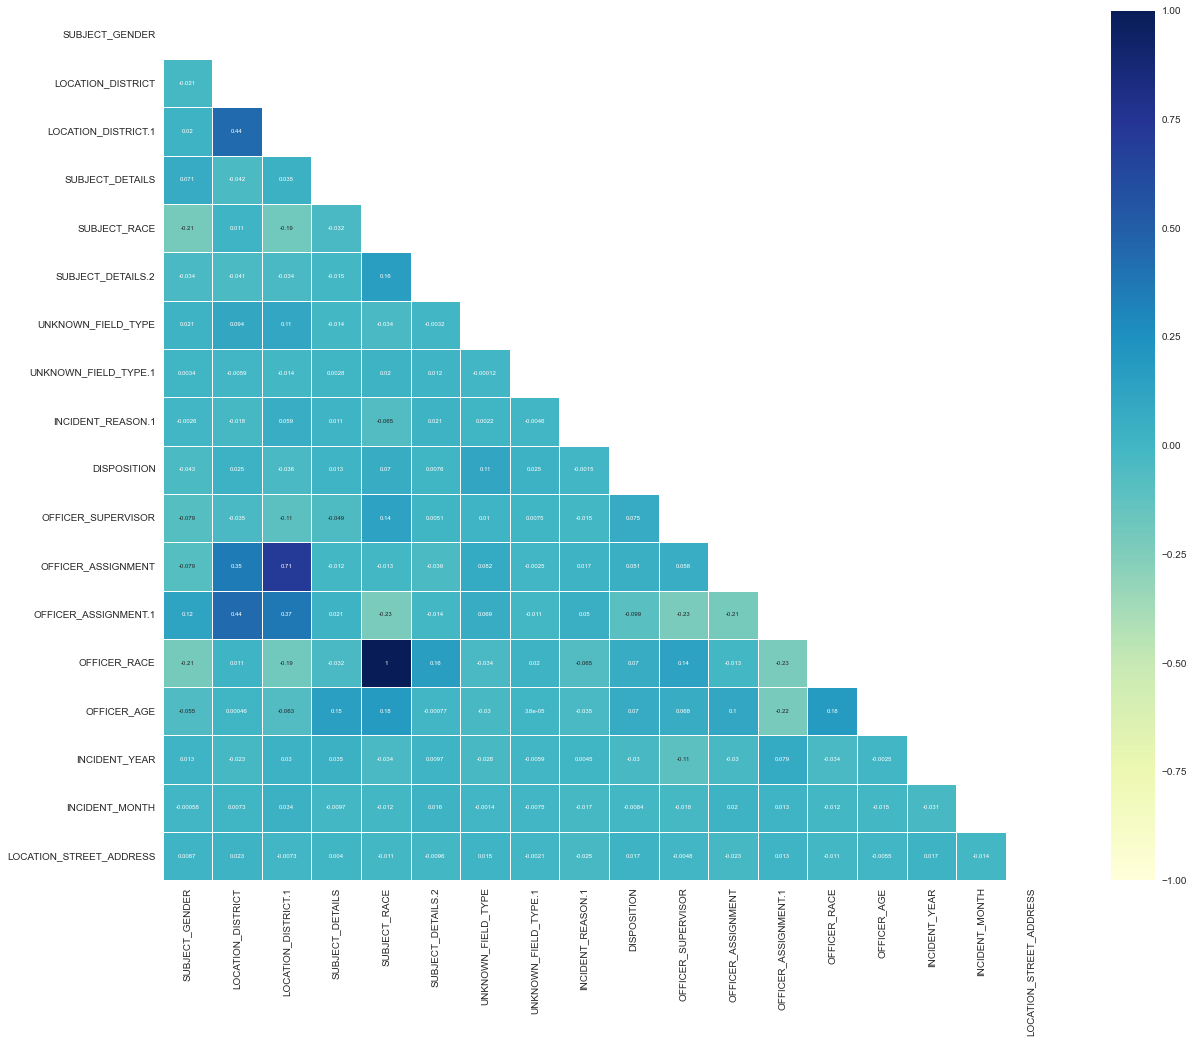

In [44]:
# Set the size of the figure
plt.figure(figsize=(20, 16))

# Create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(encoded_df.corr(), dtype=bool))

# Generate a heatmap of the correlation matrix with annotations and a different colormap
sns.heatmap(encoded_df.corr(), vmin=-1, vmax=1, mask=mask, annot=True, annot_kws={'size': 6}, linewidths=0.7, cmap='YlGnBu')

# Show the plot
plt.show()

In [45]:
# dropping the correlated columns
corr_mat = encoded_df.corr()
threshold = 0.7

for i in range(len(corr_mat.columns)):
    for n in range(i):
        if abs(corr_mat.iloc[i, n]) >= threshold:
            encoded_df.drop(columns=[corr_mat.columns[i], corr_mat.columns[n]], inplace=True)

encoded_df.shape

(15168, 14)

In [46]:
one_hot_encoded_data = pd.get_dummies(df[encoded_df.columns], columns=encoded_df.columns, dtype=float) 
one_hot_encoded_data.head()

,SUBJECT_GENDER_FEMALE,SUBJECT_GENDER_MALE,LOCATION_DISTRICT_A1,LOCATION_DISTRICT_A15,LOCATION_DISTRICT_A7,LOCATION_DISTRICT_Auto,LOCATION_DISTRICT_B2,LOCATION_DISTRICT_B3,LOCATION_DISTRICT_BIKE,LOCATION_DISTRICT_BMP,...,LOCATION_STREET_ADDRESS_ZEIGLER ST,LOCATION_STREET_ADDRESS_a CHARTER ST,LOCATION_STREET_ADDRESS_a DORCHESTER AV,LOCATION_STREET_ADDRESS_a GLENVILLE AV,LOCATION_STREET_ADDRESS_b W DEDHAM ST,LOCATION_STREET_ADDRESS_b AGUADILLA ST,LOCATION_STREET_ADDRESS_b W DEDHAM ST,LOCATION_STREET_ADDRESS_c EUSTIS ST,LOCATION_STREET_ADDRESS_unk COLUMBIA RD,LOCATION_STREET_ADDRESS_unk WESTVILLE ST
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Exploratory Data Analysis (EDA)

### Gender and Race Distribution

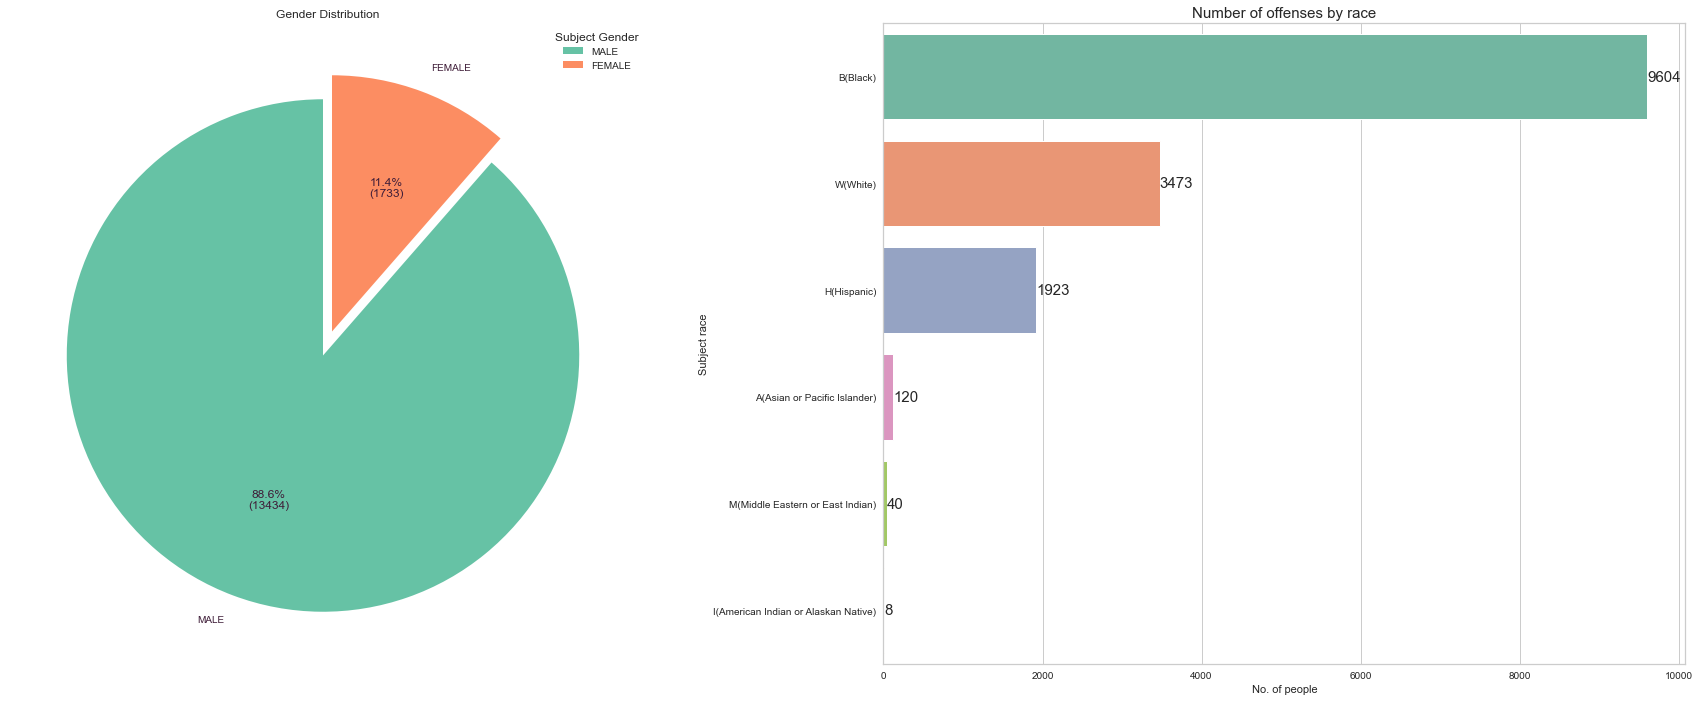

In [47]:
# Data for pie chart
data = [len(df[df['SUBJECT_GENDER'] == feature]) for feature in df['SUBJECT_GENDER'].value_counts().index[0:2]]
labels = ['MALE', 'FEMALE']
colors = ['#66c2a5', '#fc8d62']  
explode = (0.05, 0.05)

# Creating autocpt function for pie chart
def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Creating the pie chart
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
plt.pie(data, labels=labels, explode=explode, colors=colors, 
        autopct=lambda pct: func(pct, data), startangle=90, textprops=dict(color="#3F1D38"))
plt.legend(labels, title="Subject Gender")
plt.title("Gender Distribution")

# Data for bar chart
order = df['SUBJECT_RACE'].value_counts().index
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']  

# Creating the bar chart
plt.subplot(1, 2, 2)
sns.set(font_scale=1.25)  # Set font size for titles
ax = sns.countplot(data=df, y='SUBJECT_RACE', order=order, palette=colors)
for label in ax.containers:
    ax.bar_label(label)  # Add labels to bar chart

# Titles and labels
plt.title('Number of offenses by race')
plt.ylabel('Subject race')
plt.xlabel('No. of people')

# Show plots
plt.tight_layout()
plt.show()

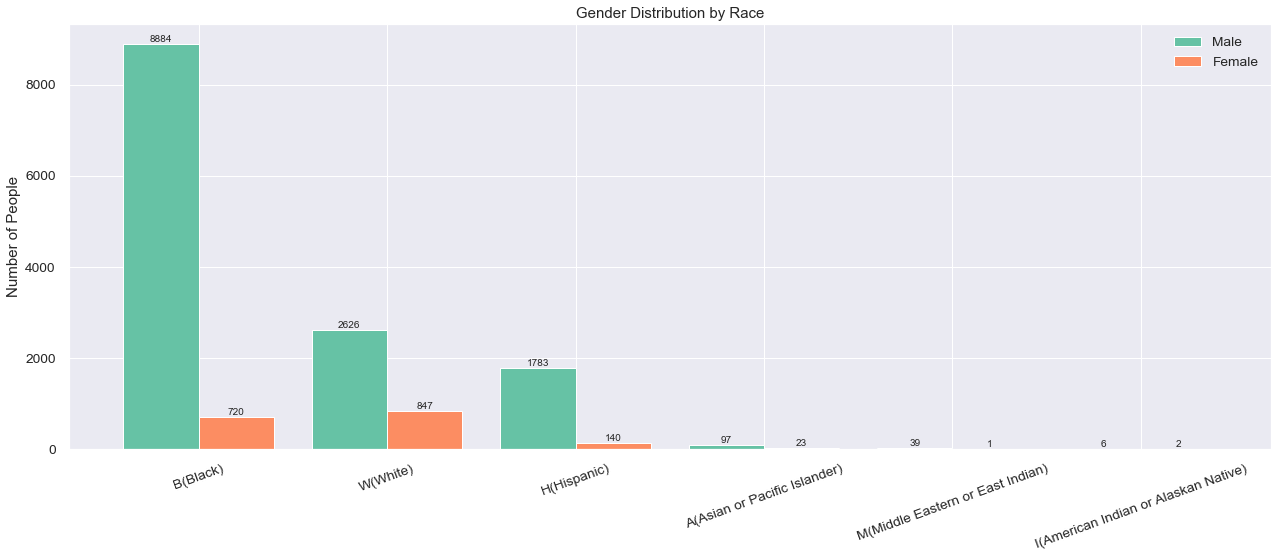

In [48]:
# Set the figure size
plt.figure(figsize=(18, 8))

# Extract unique race categories for plotting
race_to_plot = df['SUBJECT_RACE'].value_counts().index

# Filter data for male and female subjects
male = df[df['SUBJECT_GENDER'] == 'MALE']
female = df[df['SUBJECT_GENDER'] == 'FEMALE']

# Count gender and race combinations for male and female
male_counts = male['SUBJECT_RACE'].value_counts().reindex(race_to_plot, fill_value=0)
female_counts = female['SUBJECT_RACE'].value_counts().reindex(race_to_plot, fill_value=0)

# Set up positions for bars
x = np.arange(len(race_to_plot))
width = 0.4  # Width of bars
colors = ['#66c2a5', '#fc8d62']  

# Create bar plots
plt.bar(x - width/2, male_counts, width, color=colors[0], label='Male')
plt.bar(x + width/2, female_counts, width, color=colors[1], label='Female')

# Annotate bars with values
for i in range(len(race_to_plot)):
    plt.text(x[i] - width/2, male_counts[i], str(male_counts[i]), ha='center', va='bottom', fontsize=10)
    plt.text(x[i] + width/2, female_counts[i], str(female_counts[i]), ha='center', va='bottom', fontsize=10)

# Set x-axis labels and tick rotation
plt.xticks(x, race_to_plot, rotation=20)

# Set labels, legend, and title
plt.ylabel("Number of People")
plt.legend()
plt.title("Gender Distribution by Race")

# Display plot
plt.tight_layout()
plt.show()

### Number of offences distrubuted by Years and Months
The collection offers information about occurrences that happened between **2011 and 2015.** The distribution of occurrences shows that from **2011 to 2014**, the incidence rate was rather stable, ranging between **22% and 25%.** However, only **6.3%** of instances were reported in the year **2015**. Furthermore, the data shows a seasonal tendency, with a large number of events occurring during the **spring** months. In March, there were **1502** incidences, April had **1388**, and May had **1732**. The remaining instances were spread over the **summer** season, accounting for **3699**, **fall** with **3436**, and **winter** with **3386** occurrences. 


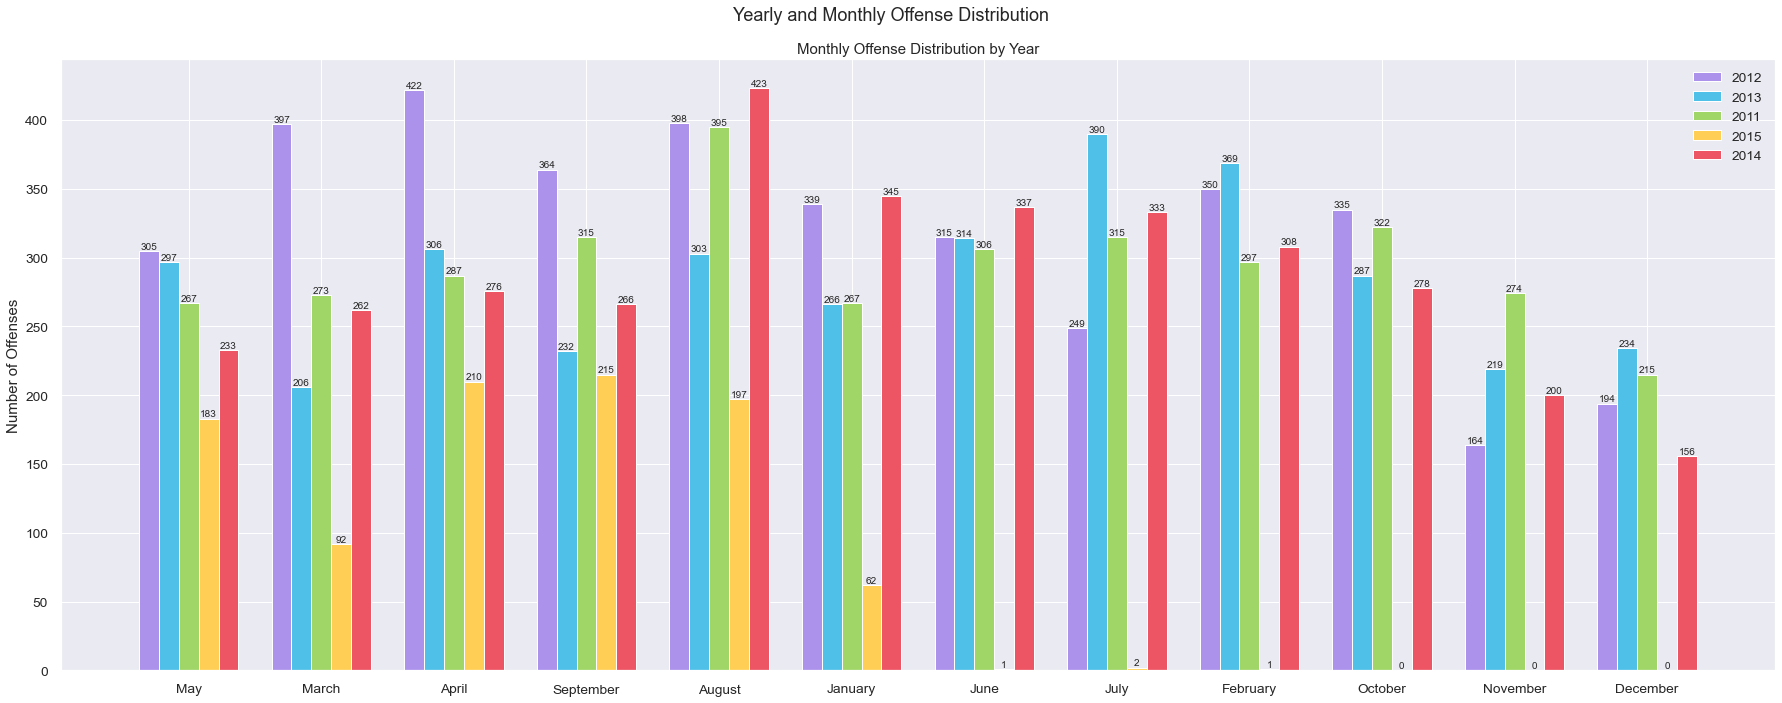

In [65]:
# This is for get unique years in the data
years_to_plot = df['INCIDENT_YEAR'].unique()

# Then, define a mapping from month names to their numeric values
month_name_to_number = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# List to store monthly counts for each year
values = []

# Iterate over unique years
for year in years_to_plot:
    c = df[df['INCIDENT_YEAR'] == year]
    value = c['INCIDENT_MONTH'].map(month_name_to_number)  # Map month names to numbers
    value_counts = value.value_counts()

    # Create an empty list to store the counts for all 12 months
    monthly_counts = [0] * 12
    
    # Fill in the counts for the months that exist
    for month, count in value_counts.items():
        monthly_counts[month - 1] = count  # Subtract 1 to adjust for zero-based indexing

    values.append(monthly_counts)

x = np.arange(1, 13)
width = 0.15
colors = ['#AC92EB', '#4FC1E8', '#A0D568', '#FFCE54', '#ED5564']

plt.figure(figsize=(25, 10))
for n in range(len(years_to_plot)):
    plt.bar(x + (n - 2) * width, values[n], width=width, color=colors[n])

# Annotate the bars with their values
for n in range(len(years_to_plot)):
    for i in range(12):
        plt.text(x[i] + (n - 2) * width, values[n][i], str(values[n][i]), ha='center', va='bottom', fontsize=10)

order = df['INCIDENT_MONTH'].value_counts().index
plt.xticks(x, order)
plt.ylabel("Number of Offenses")
plt.legend(years_to_plot)  # Use the extracted unique years
plt.title("Monthly Offense Distribution by Year")

# Adding an overall title to the entire figure
plt.suptitle("Yearly and Monthly Offense Distribution")

# Show plots
plt.tight_layout()
plt.show()

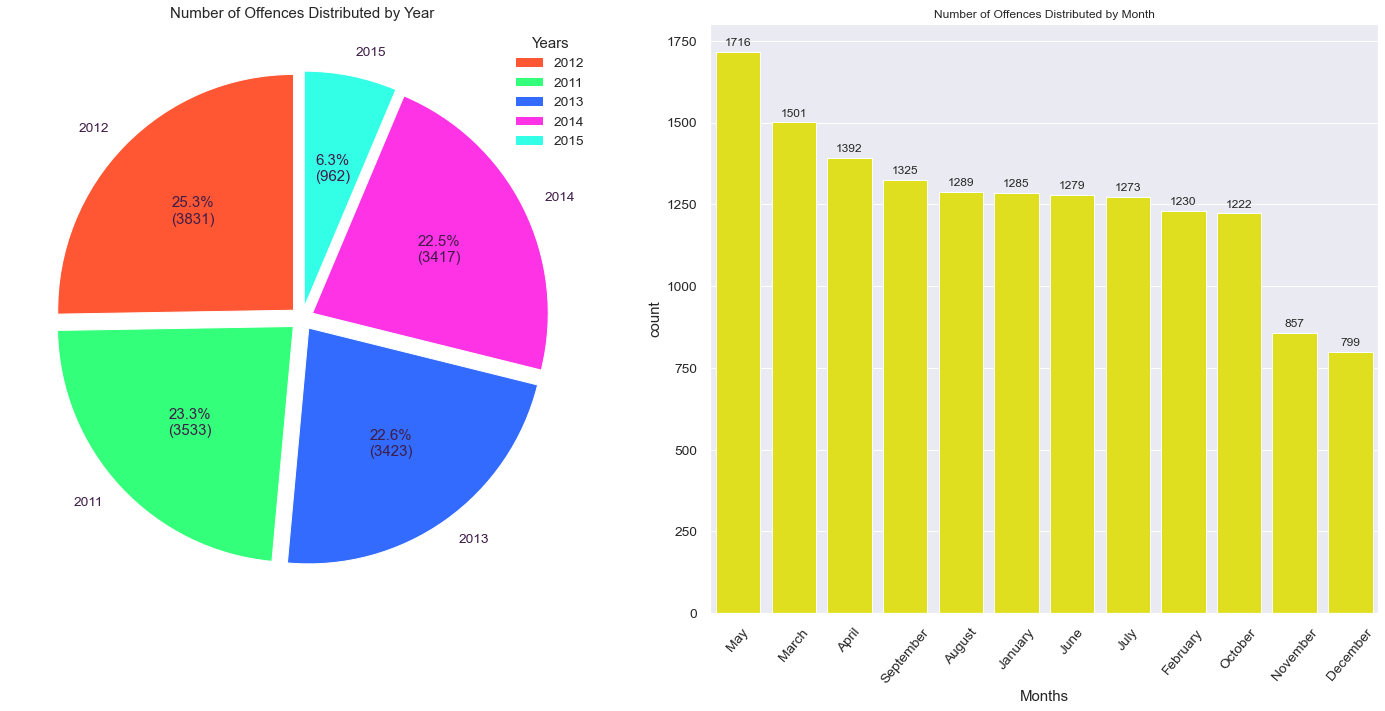

In [50]:
# Pie Chart

# Creating data
data = [len(df[df['INCIDENT_YEAR'] == feature]) for feature in df['INCIDENT_YEAR'].value_counts().index]
labels = df['INCIDENT_YEAR'].value_counts().index

colors = ['#FF5733', '#33FF7A', '#336BFF', '#FF33E6', '#33FFE6'] 
explode = (0.05, 0.05, 0.05, 0.05, 0.05)  # Explode data

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Creating plot
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.pie(data, labels=labels, explode=explode, colors=colors, autopct=lambda pct: func(pct, data), 
        startangle=90, textprops=dict(color="#3F1D48"))

# Adding legend
plt.legend(labels, title="Years", loc='best')

plt.title("Number of Offences Distributed by Year")

# Bar chart
plt.subplot(1, 2, 2)
order = df['INCIDENT_MONTH'].value_counts().index

# Set the font size for titles
sns.set(font_scale=1)

ax = sns.countplot(data=df, x='INCIDENT_MONTH', order=order, color='#FFFF00') 
plt.xticks(rotation=50)

for label in ax.containers[0]:
    ax.annotate(format(int(label.get_height())), 
                (label.get_x() + label.get_width() / 2., label.get_height()), 
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')
    
plt.title('Number of Offences Distributed by Month')
plt.xlabel('Months')

plt.tight_layout() 
plt.show()

### Number of Offences Distributed by Location


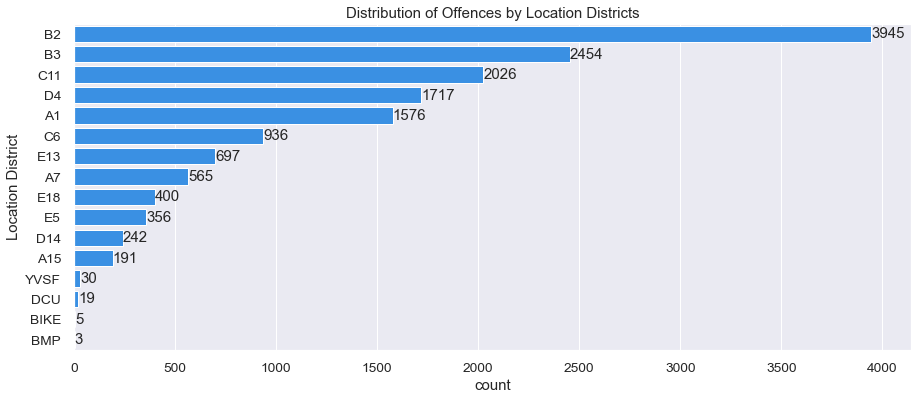

In [51]:
# Bar chart for Location Districts
plt.figure(figsize=(15, 6))

# Define the order of Location Districts to display
order = df['LOCATION_DISTRICT'].value_counts().index[0:16]

# Set the font size for titles
sns.set(font_scale=1.25)

ax = sns.countplot(y=df['LOCATION_DISTRICT'], order=order, color='#1E90FF')

# Annotate the bars with their counts
for label in ax.containers:
    ax.bar_label(label)

plt.title('Distribution of Offences by Location Districts')
plt.ylabel('Location District')

plt.show()


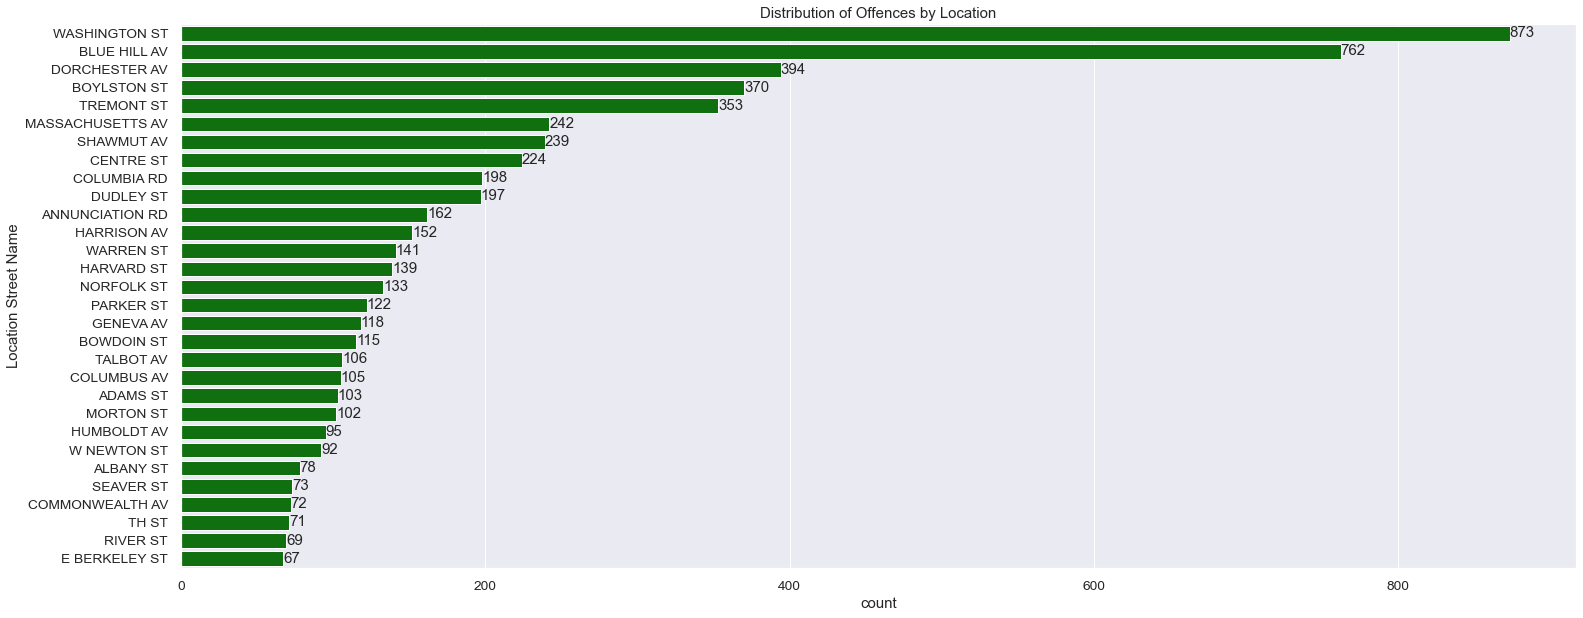

In [52]:
# Bar chart for Location Street Address
plt.figure(figsize=(25, 10))

# Define the order of Location Street Address to display
order = df['LOCATION_STREET_ADDRESS'].value_counts().index[0:30]

# Set the font size for titles
sns.set(font_scale=1.25)

ax = sns.countplot(y=df['LOCATION_STREET_ADDRESS'], order=order, color='#008000')

# Annotate the bars with their counts
for label in ax.containers:
    ax.bar_label(label)

plt.title('Distribution of Offences by Location')
plt.ylabel('Location Street Name')

plt.show()


### Officer Related Information 
The ages and assignments of the policemen are shown visually in the two photographs that are displayed. The information demonstrates that the most common age groups among officers are those in their **twenties** (20–29 years old), which account for **7242 persons**. Next in line are those in their **thirties** (30–39 years old), which comprise **2747**. Regarding assignments, **4350** officers, or a considerable portion of the total, are working on **YVSF** duties. Furthermore, **B2** is assigned to **2311 officers**, and **A1** is assigned to **1618 officers**.

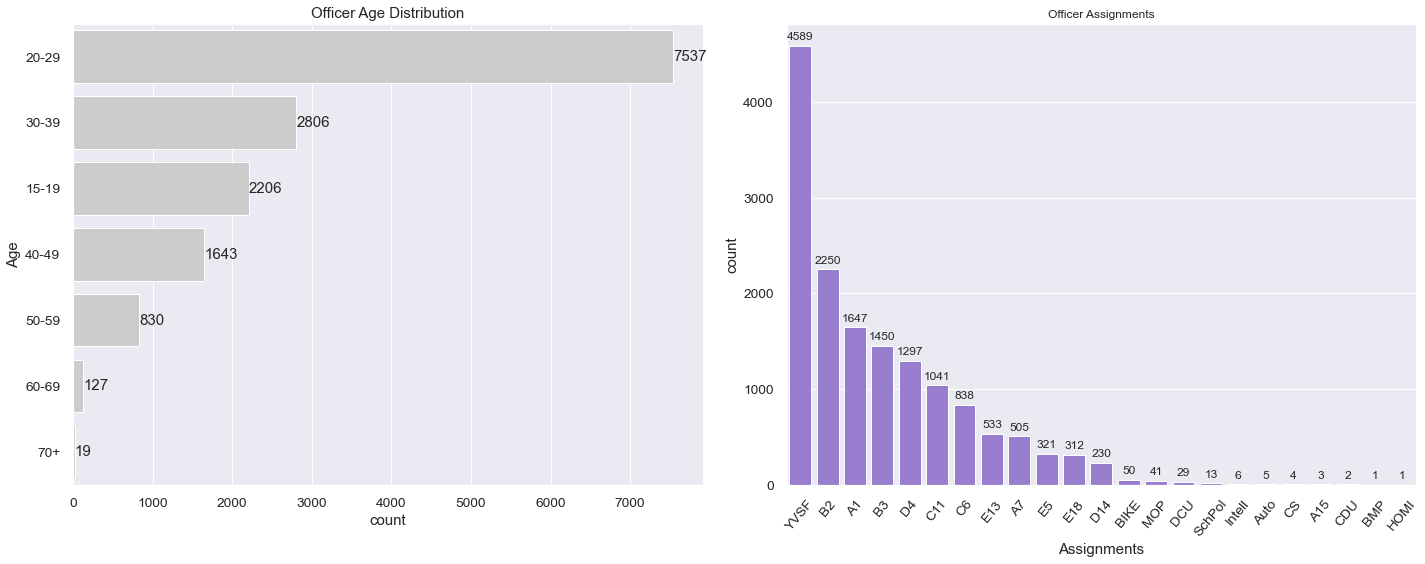

In [53]:
# Creating data for officer age and assignment
plt.figure(figsize=(20, 8))

# Subplot 1: Officer Age
plt.subplot(1, 2, 1)
order_age = df['OFFICER_AGE'].value_counts().index[:12]
ax_age = sns.countplot(y=df['OFFICER_AGE'], order=order_age, color='#CCCCCC')  

# Annotate the bars with their counts
for label_age in ax_age.containers:
    ax_age.bar_label(label_age)

plt.ylabel('Age')
plt.title("Officer Age Distribution")

# Subplot 2: Officer Assignments
plt.subplot(1, 2, 2)
order_assignment = df['OFFICER_ASSIGNMENT.1'].value_counts().index

# Set the font size for titles
sns.set(font_scale=1)

ax_assignment = sns.countplot(data=df, x='OFFICER_ASSIGNMENT.1', order=order_assignment, color='#9370DB')  
plt.xticks(rotation=50)

# Annotate the bars with their counts
for label_assignment in ax_assignment.containers[0]:
    ax_assignment.annotate(format(int(label_assignment.get_height())), 
                            (label_assignment.get_x() + label_assignment.get_width() / 2., label_assignment.get_height()), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.title('Officer Assignments')
plt.xlabel('Assignments')

plt.tight_layout() 
plt.show()


### Number of offenses broken down by cause of incident

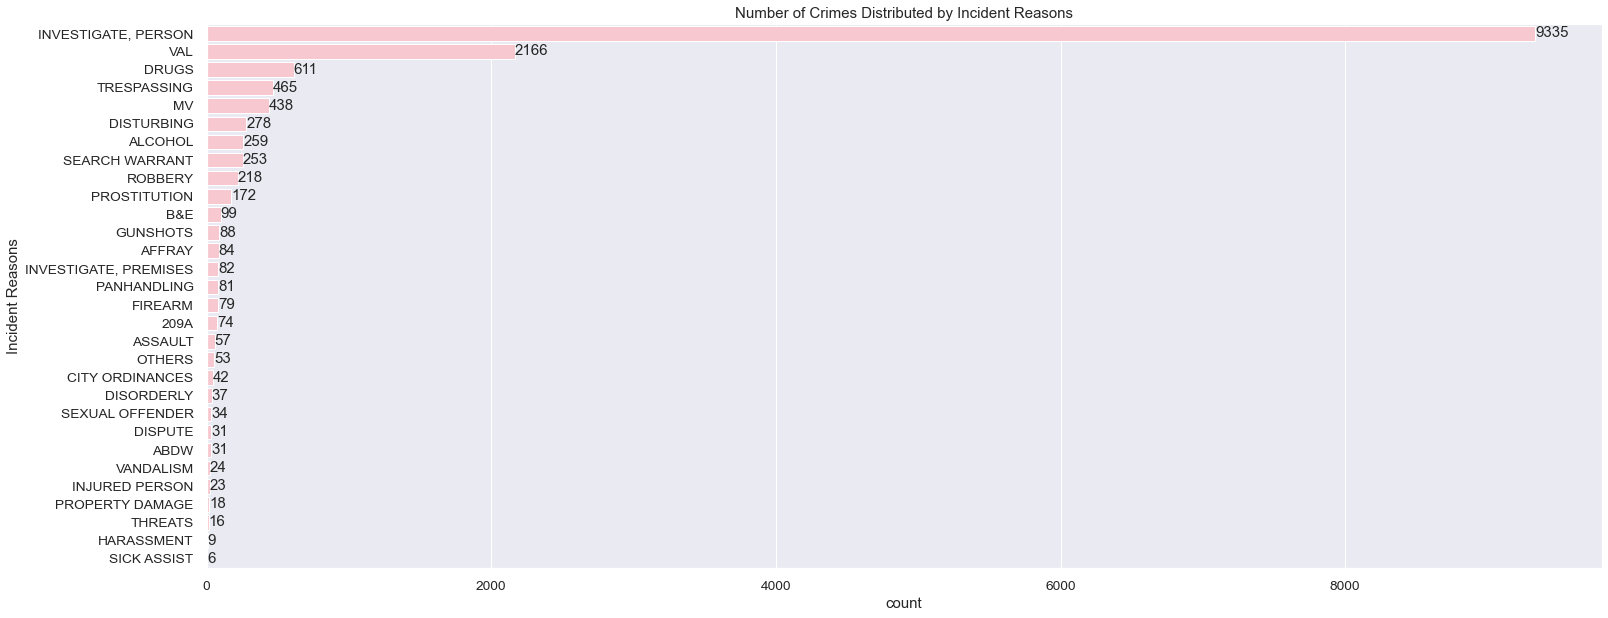

In [54]:
# Creating data for the bar chart
plt.figure(figsize=(25, 10))

# Specify the order of categories for better visualization
order_reasons = df['INCIDENT_REASON.1'].value_counts().index[0:30]

# Set the font size for titles
sns.set(font_scale=1.25)

# Create the count plot with seaborn
ax = sns.countplot(y=df['INCIDENT_REASON.1'], order=order_reasons, color='#FFC0CB')  

# Annotate the bars with their counts
for label in ax.containers:
    ax.bar_label(label)

# Set the title and labels
plt.title('Number of Crimes Distributed by Incident Reasons')
plt.ylabel('Incident Reasons')

# Show the plot
plt.show()


# Clustering

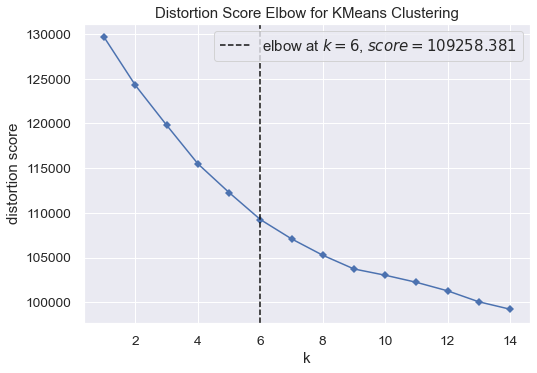

In [56]:
# Elbow method to find optimal k
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 15), timings=False)
visualizer.fit(one_hot_encoded_data)
visualizer.show()

# Get optimal k from the Elbow method
optimal_k = visualizer.elbow_value_

In [57]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, max_iter=100).fit(one_hot_encoded_data)
 
# Retrieve the cluster centroids and store them in a dataframe.
centers = kmeans.cluster_centers_

# Retrieve and store the labels assigned to each cluster.
labels = kmeans.labels_ 

### The quality of the Cluster

In [58]:
cluster_properties = []
cluster_sizes = []

for i in range(optimal_k):    
    cluster_data = one_hot_encoded_data[labels == i]
    size_of_cluster = len(cluster_data)    
    cluster_center = centers[i]
    average_distance = np.mean(np.linalg.norm(cluster_data - cluster_center, axis=1))    
    cluster_properties.append({
        "Cluster": i,        
        "Size": size_of_cluster,
        "Average Distance": average_distance,    
    })
    
cluster_properties

[{'Cluster': 0, 'Size': 1647, 'Average Distance': 2.589160464802414},
 {'Cluster': 1, 'Size': 1300, 'Average Distance': 2.4705809195807418},
 {'Cluster': 2, 'Size': 2261, 'Average Distance': 2.5691949430591654},
 {'Cluster': 3, 'Size': 4576, 'Average Distance': 2.616195257763338},
 {'Cluster': 4, 'Size': 3927, 'Average Distance': 2.9862714202863736},
 {'Cluster': 5, 'Size': 1457, 'Average Distance': 2.3679643241275454}]

In [59]:
silhouette_avg = silhouette_score(one_hot_encoded_data, labels)
print('Average Silhouette Score:', round(silhouette_avg, 4))

db_index = davies_bouldin_score(one_hot_encoded_data, labels)
print('Davies-Bouldin Index:', round(db_index, 4))

ch_score = calinski_harabasz_score(one_hot_encoded_data, labels)
print('Calinski-Harabasz Index:', round(ch_score, 4))

wcss = kmeans.inertia_
print('Within-Cluster Sum of Squares (WCSS):', round(wcss, 4))

Average Silhouette Score: 0.0726
Davies-Bouldin Index: 3.4528
Calinski-Harabasz Index: 564.9877
Within-Cluster Sum of Squares (WCSS): 109258.3955


In [60]:
df['CLUSTERS'] = kmeans.labels_

In [61]:
def cluster_profile(df):
    profiles = {}
    
    for column in df.columns:
        if column != 'CLUSTERS':
            profiles[column] = df[column].mode()[0]
    
    return profiles

In [62]:
cluster_profile = df.groupby('CLUSTERS').apply(cluster_profile)
cluster_profile_df = pd.DataFrame(cluster_profile.tolist(), index=cluster_profile.index)

cluster_profile_df

,SUBJECT_GENDER,LOCATION_DISTRICT,LOCATION_DISTRICT.1,SUBJECT_DETAILS,SUBJECT_RACE,SUBJECT_DETAILS.2,UNKNOWN_FIELD_TYPE,UNKNOWN_FIELD_TYPE.1,INCIDENT_REASON.1,DISPOSITION,OFFICER_SUPERVISOR,OFFICER_ASSIGNMENT,OFFICER_ASSIGNMENT.1,OFFICER_RACE,OFFICER_AGE,INCIDENT_YEAR,INCIDENT_MONTH,LOCATION_STREET_ADDRESS
CLUSTERS,,,,,,,,,,,,,,,,,,
0,MALE,A1,1,YES,W(White),Med,I,NO,"INVESTIGATE, PERSON",F,8949.0,1,A1,W(White),20-29,2011,May,BOYLSTON ST
1,MALE,D4,8,YES,B(Black),Med,IO,NO,"INVESTIGATE, PERSON",F,11756.0,8,D4,B(Black),20-29,2011,June,SHAWMUT AV
2,MALE,B2,3,YES,B(Black),Med,IO,NO,"INVESTIGATE, PERSON",F,11610.0,3,B2,B(Black),20-29,2013,May,BLUE HILL AV
3,MALE,B2,3,YES,B(Black),Med,IO,NO,"INVESTIGATE, PERSON",F,86124.0,16,YVSF,B(Black),20-29,2014,May,BLUE HILL AV
4,MALE,C11,5,YES,B(Black),Med,IO,NO,"INVESTIGATE, PERSON",F,8662.0,5,C11,B(Black),20-29,2011,May,DORCHESTER AV
5,MALE,B3,4,YES,B(Black),Med,IO,NO,"INVESTIGATE, PERSON",F,11756.0,4,B3,B(Black),20-29,2012,March,BLUE HILL AV


### Visualization of the Cluster

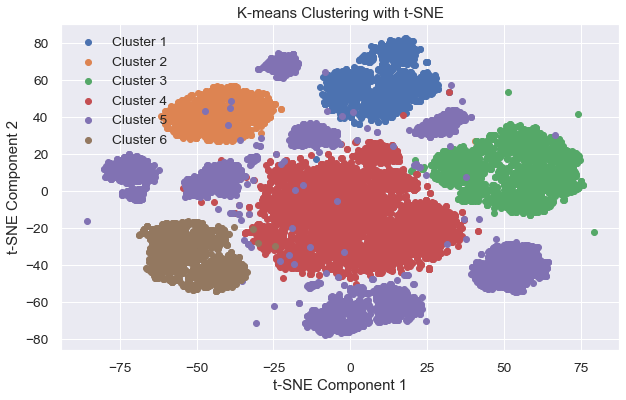

In [63]:
# The vizualization with TSNE

tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(one_hot_encoded_data)

plt.figure(figsize=(10, 6))
for i in range(optimal_k):
    plt.scatter(tsne_results[labels == i][:, 0], 
                tsne_results[labels == i][:, 1], label=f'Cluster {i + 1}')
    
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('K-means Clustering with t-SNE')
plt.legend(loc='best')
plt.show()

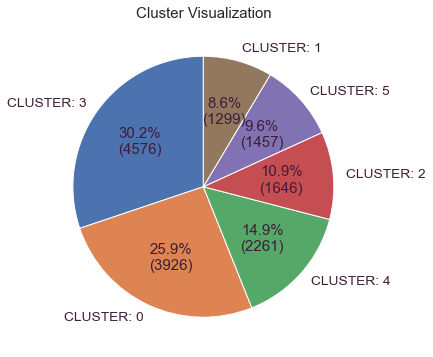

In [64]:
data = [len(df[df['CLUSTERS'] == feature]) for feature in df['CLUSTERS'].value_counts().index]
clusters = df['CLUSTERS'].unique()
labels = [f'CLUSTER: {clusters[i]}' for i in range(len(clusters))]

# Generating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Creating the pie chart
plt.figure(figsize=(10, 6))
plt.pie(data, labels=labels, autopct=lambda pct: func(pct, data), 
        startangle=90, textprops=dict(color="#3F1D38"))

plt.title('Cluster Visualization')
plt.show()